In [1]:
# Naive Bayes Classifier and its two types of application on SciKit-learn datasets.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')

In [4]:
# 1. The Gaussian Naive Bayes Classifier

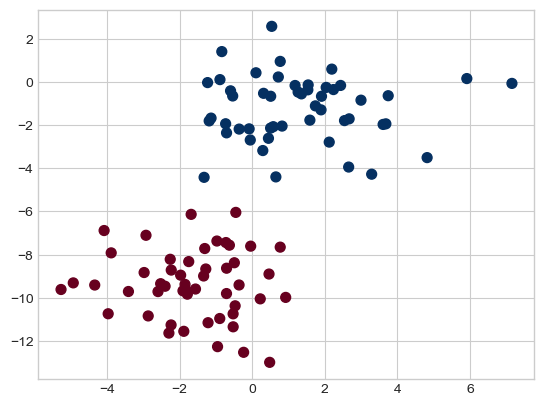

In [7]:
# Data generation from SciKit-learn dataset and visualisation

from sklearn.datasets import make_blobs
X, y = make_blobs(100, 2, centers=2, random_state=2, cluster_std=1.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [9]:
# Model selecting and training

from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y)

GaussianNB()

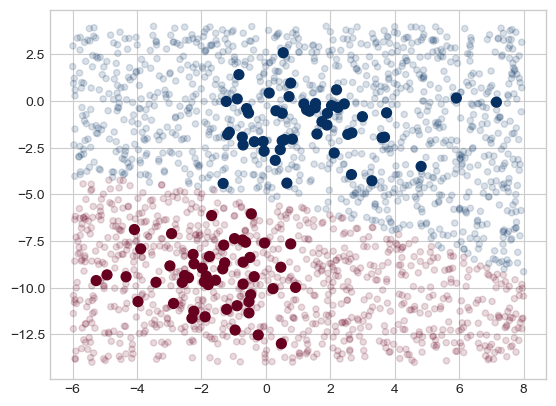

In [11]:
# Test data generation and visualisation

rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14,18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.15)

In [13]:
# Probabilistic classification

yprob = model.predict_proba(Xnew)
yprob[-10:].round(2)

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

In [15]:
means = yprob.mean(axis=0)
print(means)

[0.45712257 0.54287743]


In [17]:
# 2. Multinomial Naive Bayes Classifier

In [19]:
# Import dataset from SciKit-learn

from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [21]:
categories = ['talk.religion.misc', 'soc.religion.christian', 'sci.space', 'comp.graphics']

train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

print(train.data[5][47:])


Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [23]:
# Pipeline creating (using term frequency-inverse document frequency method and model selecting)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [25]:
# Model training
model.fit(train.data, train.target)
labels = model.predict(test.data)

Text(120.37708333333332, 0.5, 'Predicted data')

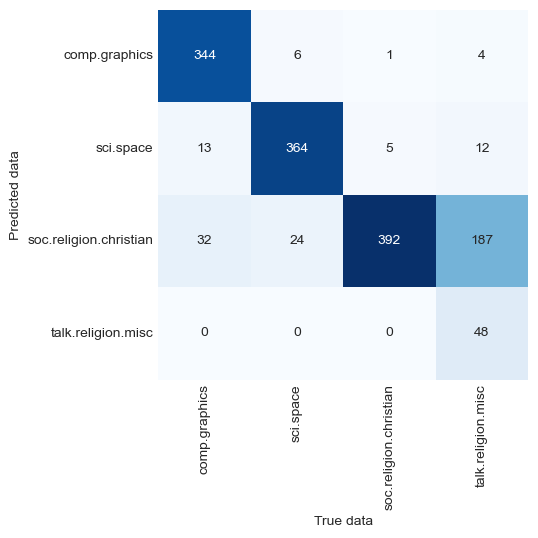

In [27]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

matrix = confusion_matrix(test.target, labels)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False, 
            xticklabels=train.target_names, yticklabels=train.target_names, cmap='Blues')
plt.xlabel('True data')
plt.ylabel('Predicted data')

In [29]:
# Model predicting

def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [31]:
predict_category('sending a payload to the ISS')

'sci.space'

In [33]:
predict_category('discussing the existence of God')

'soc.religion.christian'

In [35]:
predict_category('determining the screen resolution')

'comp.graphics'